In [ ]:
!pip install neuralprophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/Meta Dataset.csv'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/Meta Dataset.csv')

In [ ]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.189480   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  33.993931   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  30.967144   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  31.966084   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  32.994991   

      Volume  
0  573576400  
1  168192700  
2  101786600  
3   73600000  
4   50237200

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3028 non-null   object 
 1   Open       3028 non-null   float64
 2   High       3028 non-null   float64
 3   Low        3028 non-null   float64
 4   Close      3028 non-null   float64
 5   Adj Close  3028 non-null   float64
 6   Volume     3028 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 165.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df = df[['Date', 'Close']]

In [ ]:
df.head()

Date      Close
0 2012-05-18  38.230000
1 2012-05-21  34.029999
2 2012-05-22  31.000000
3 2012-05-23  32.000000
4 2012-05-24  33.029999

In [ ]:
df.columns = ['ds', 'y']

In [ ]:
df.head()

ds          y
0 2012-05-18  38.230000
1 2012-05-21  34.029999
2 2012-05-22  31.000000
3 2012-05-23  32.000000
4 2012-05-24  33.029999

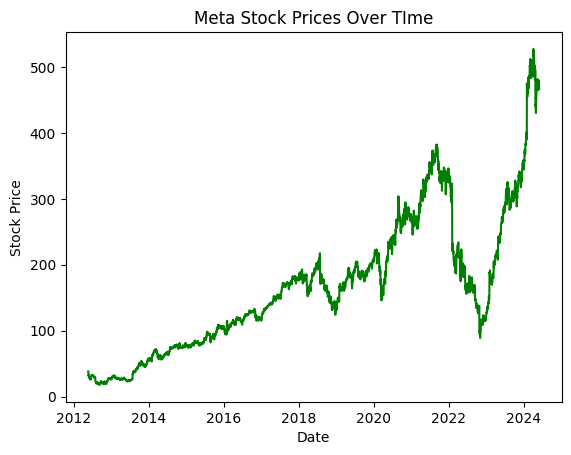

In [ ]:
plt.plot(df['ds'], df['y'], label='actual', c='g')
plt.title('Meta Stock Prices Over TIme')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
model = NeuralProphet(
    batch_size=16
)

model.fit(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.268% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.268% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 80
INFO:NP.config:Auto-set epochs to 80


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (190) is too small than the required number                     for the learning rate finder (237). The results might not be optimal.


Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

train_loss  reg_loss         MAE        RMSE      Loss  RegLoss  epoch
0     0.257815       0.0  161.843307  198.325989  0.257037      0.0      0
1     0.064576       0.0   61.339188   77.733116  0.064361      0.0      1
2     0.043747       0.0   41.796520   58.027061  0.043614      0.0      2
3     0.041203       0.0   38.488132   55.222210  0.041149      0.0      3
4     0.040950       0.0   38.130337   55.034222  0.040834      0.0      4
..         ...       ...         ...         ...       ...      ...    ...
75    0.037180       0.0   29.907446   51.254337  0.037688      0.0     75
76    0.037252       0.0   29.722521   50.836533  0.037107      0.0     76
77    0.037119       0.0   29.651352   50.263657  0.036974      0.0     77
78    0.037155       0.0   30.015465   51.179806  0.037334      0.0     78
79    0.037137       0.0   29.835432   50.769505  0.036995      0.0     79

[80 rows x 7 columns]

In [ ]:
future = model.make_future_dataframe(df, periods=365)

forecast = model.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.268% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.268% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


ds     y       yhat1       trend  season_yearly  season_weekly
0   2024-06-03  None  298.499237  330.230652      -0.146132     -31.585258
1   2024-06-04  None  298.712646  330.257996      -0.444604     -31.100739
2   2024-06-05  None  297.719696  330.285309      -0.727075     -31.838547
3   2024-06-06  None  296.526001  330.312653      -0.994012     -32.792645
4   2024-06-07  None  294.799255  330.339996      -1.238992     -34.301754
..         ...   ...         ...         ...            ...            ...
360 2025-10-20  None  309.214722  344.010773      -3.076255     -31.719799
361 2025-10-21  None  309.897675  344.038116      -3.050440     -31.089994
362 2025-10-22  None  309.157532  344.065460      -3.001611     -31.906309
363 2025-10-23  None  308.234161  344.092804      -2.930969     -32.927673
364 2025-10-24  None  307.012329  344.120148      -2.839860     -34.267971

[365 rows x 6 columns]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.268% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.268% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.268% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.268% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


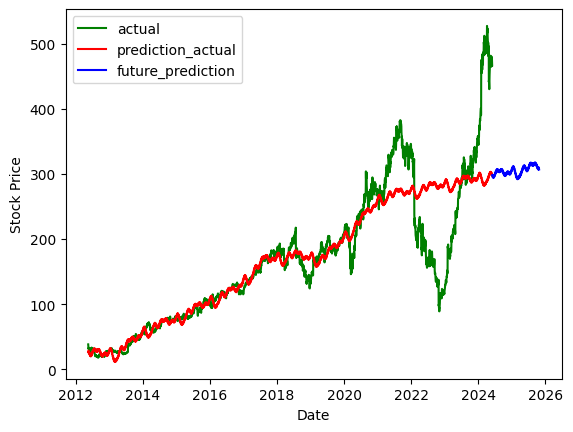

In [ ]:
actual_prediction = model.predict(df)

plt.plot(df['ds'], df['y'], label='actual', c='g')
plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label='prediction_actual', c='r')
plt.plot(forecast['ds'], forecast['yhat1'], label='future_prediction', c='b')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

In [ ]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
